In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sleep pattern analysis (Responses) - Form Responses 1.csv')
df.head()


,Timestamp,Name,Age,Gender,What time do you usually go to bed?,What time do you wake up?,How many hours do you sleep on average?,How restful do you feel after sleeping?,Do you wake up multiple times during the night?,How long does it take you to fall asleep?,"Do you consume caffeine (coffee, tea, energy drinks)?",Do you use screens (phone/laptop/TV) before bed?,How often do you exercise?,Do you snore while sleeping?,Do you feel sleepy during the day despite sleeping at night?,Any other factors that affect your sleep?,"If Yes, how many cups per day?","If Yes, for how long?"
0,3/11/2025 16:00:39,NaN,20,Female,10:30:00 PM,4:30:00 AM,5,1,Yes,15-30 min,yes,Yes,Never,No,Yes,Nil,NaN,NaN
1,3/11/2025 16:29:24,Sanjay Ponnambalam N,20,Male,12:30:00 AM,7:30:00 AM,5 - 7 hours,7,No,5-15 min,yes,Yes,Daily,No,Yes,"Proximity to highly congested road, Lighting o...",2,<30 min
2,3/11/2025 16:29:52,GS Anasuya,20,Female,1:00:00 AM,11:30:00 AM,6,5,No,More than 30 min,no,Yes,Rarely,No,Yes,"Stress, bad roommate and college work",NaN,>60 min
3,3/11/2025 16:31:07,Atharv,20,Male,12:00:00 PM,5:45:00 AM,6,8,No,15-30 min,yes,Yes,Daily,No,Yes,Sounds my sleep is very fragile even with a sm...,250mg caffeine,<30 min
4,3/11/2025 16:32:40,Akash,21,Male,12:00:00 PM,5:15:00 AM,5:15,4,No,Less than 5 min,no,Yes,Daily,Maybe,Yes,Ex memories,NaN,>60 min


data wrangling and transformation

In [10]:

# Correct file path
file_path = "/content/sleep pattern analysis (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Drop rows with missing name
df.dropna(subset=["name"], inplace=True)

# Standardize all string entries
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Extract sleep hours
import re
import numpy as np

def extract_sleep_hours(val):
    if isinstance(val, str):
        if ':' in val:
            try:
                h, m = map(int, val.split(":"))
                return round(h + m / 60, 2)
            except:
                return np.nan
        elif '-' in val:
            nums = re.findall(r'\d+', val)
            if nums:
                return round(np.mean(list(map(int, nums))), 2)
        else:
            try:
                return float(val)
            except:
                return np.nan
    return val

df['sleep_hours'] = df['how many hours do you sleep on average?'].apply(extract_sleep_hours)

# Map categorical fields to numeric
df['caffeine'] = df['do you consume caffeine (coffee, tea, energy drinks)?'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
df['screen_time'] = df['do you use screens (phone/laptop/tv) before bed?'].map({'yes': 1, 'no': 0})
df['wake_ups'] = df['do you wake up multiple times during the night?'].map({'yes': 1, 'no': 0})

# Map fall asleep time
fall_asleep_map = {
    'less than 5 min': 3,
    '5-15 min': 10,
    '15-30 min': 22,
    'more than 30 min': 40
}
df['fall_asleep_time'] = df['how long does it take you to fall asleep?'].map(fall_asleep_map)

# Map exercise levels
activity_map = {
    'never': 0,
    'rarely': 1,
    'sometimes': 2,
    'daily': 3
}
df['exercise_level'] = df['how often do you exercise?'].map(activity_map)

# Show result
df.head()


<ipython-input-10-f3e3b107a53f>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


,timestamp,name,age,gender,what time do you usually go to bed?,what time do you wake up?,how many hours do you sleep on average?,how restful do you feel after sleeping?,do you wake up multiple times during the night?,how long does it take you to fall asleep?,...,do you feel sleepy during the day despite sleeping at night?,any other factors that affect your sleep?,"if yes, how many cups per day?","if yes, for how long?",sleep_hours,caffeine,screen_time,wake_ups,fall_asleep_time,exercise_level
1,3/11/2025 16:29:24,sanjay ponnambalam n,20,male,12:30:00 am,7:30:00 am,5 - 7 hours,7,no,5-15 min,...,yes,"proximity to highly congested road, lighting o...",2,<30 min,6.00,1,1,0,10,3.0
2,3/11/2025 16:29:52,gs anasuya,20,female,1:00:00 am,11:30:00 am,6,5,no,more than 30 min,...,yes,"stress, bad roommate and college work",NaN,>60 min,6.00,0,1,0,40,1.0
3,3/11/2025 16:31:07,atharv,20,male,12:00:00 pm,5:45:00 am,6,8,no,15-30 min,...,yes,sounds my sleep is very fragile even with a sm...,250mg caffeine,<30 min,6.00,1,1,0,22,3.0
4,3/11/2025 16:32:40,akash,21,male,12:00:00 pm,5:15:00 am,5:15,4,no,less than 5 min,...,yes,ex memories,NaN,>60 min,5.25,0,1,0,3,3.0
5,3/11/2025 16:44:01,nithyalakshmi.g,21,female,12:30:00 am,6:30:00 am,7 hours,7,no,15-30 min,...,no,stress and over thinking,NaN,30-60 min,NaN,0,1,0,22,1.0


Importing  Visualization Libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



# For better visuals
sns.set(style="whitegrid")


Distribution of Sleep Hours

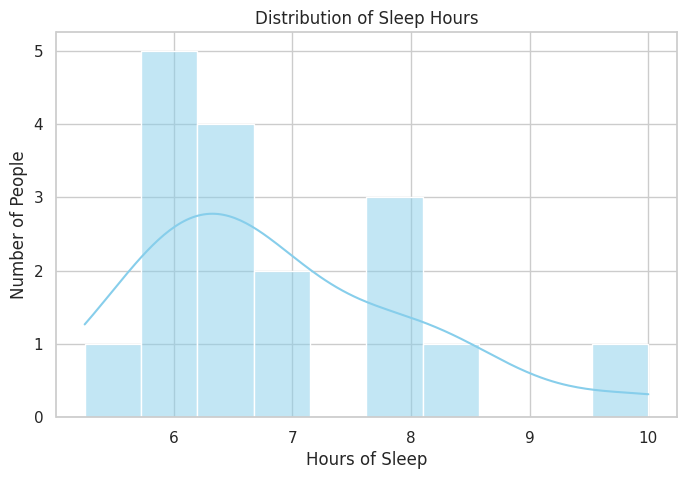

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Hours of Sleep')
plt.ylabel('Number of People')
plt.show()

Sleep Hours vs. Caffeine Consumption

<ipython-input-13-9a45fcfad700>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='caffeine', y='sleep_hours', data=df, palette='pastel')


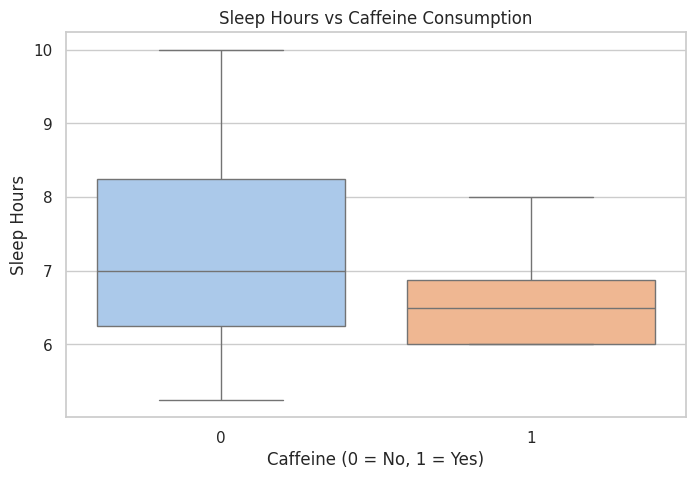

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='caffeine', y='sleep_hours', data=df, palette='pastel')
plt.title('Sleep Hours vs Caffeine Consumption')
plt.xlabel('Caffeine (0 = No, 1 = Yes)')
plt.ylabel('Sleep Hours')
plt.show()


Sleep Hours vs. Screen Time

<ipython-input-18-c3c29f35ab1e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='screen_time', y='sleep_hours', data=df, palette='Set2')


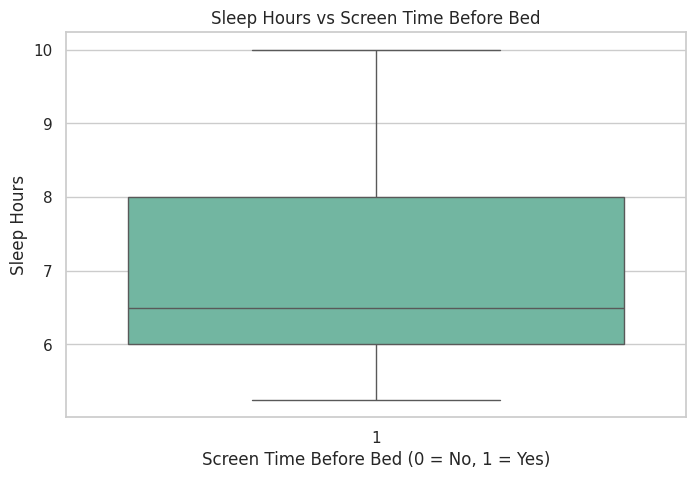

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='screen_time', y='sleep_hours', data=df, palette='Set2')
plt.title('Sleep Hours vs Screen Time Before Bed')
plt.xlabel('Screen Time Before Bed (0 = No, 1 = Yes)')
plt.ylabel('Sleep Hours')
plt.show()


Sleep Hours vs. Exercise Level

<ipython-input-15-5c2e6a8f119b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='exercise_level', y='sleep_hours', data=df, palette='muted')


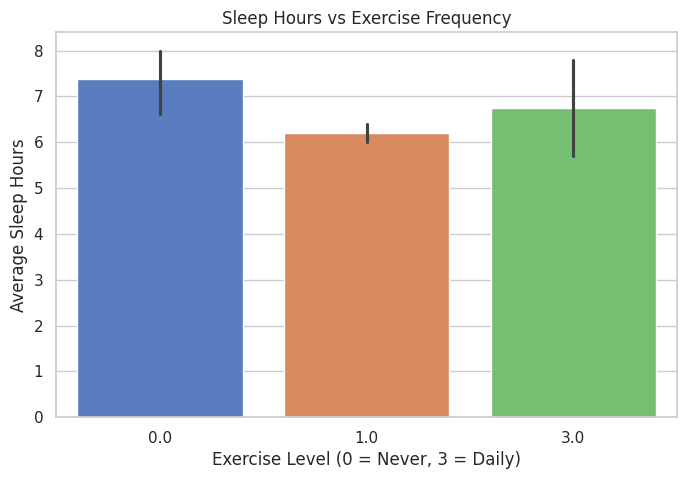

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='exercise_level', y='sleep_hours', data=df, palette='muted')
plt.title('Sleep Hours vs Exercise Frequency')
plt.xlabel('Exercise Level (0 = Never, 3 = Daily)')
plt.ylabel('Average Sleep Hours')
plt.show()


Fall Asleep Time Distribution

<ipython-input-16-5c9d3e6106b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fall_asleep_time', data=df, palette='coolwarm')


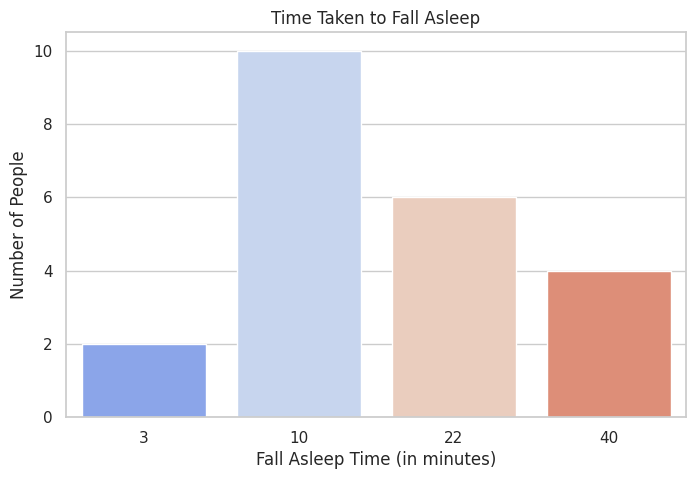

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fall_asleep_time', data=df, palette='coolwarm')
plt.title('Time Taken to Fall Asleep')
plt.xlabel('Fall Asleep Time (in minutes)')
plt.ylabel('Number of People')
plt.show()
